In [3]:
import mne


#data_path = mne.datasets.sample.data_path()
raw_fname = "Subject00_1.fif"
raw = mne.io.read_raw_fif(raw_fname, preload=True)


raw.crop(tmin=10, tmax=60)  # take 30 seconds for speed

# pick only EEG channels, muscle artifact is basically not picked up by MEG
# if you have a simultaneous recording, you may want to do ICA on MEG and EEG
# separately
raw.pick(picks="eeg", exclude="bads")

rename_dict = {
    'EEG Fp1': 'Fp1', 'EEG Fp2': 'Fp2', 'EEG F3': 'F3', 'EEG F4': 'F4', 
    'EEG F7': 'F7', 'EEG F8': 'F8', 'EEG T3': 'T7', 'EEG T4': 'T8', 
    'EEG C3': 'C3', 'EEG C4': 'C4', 'EEG T5': 'P7', 'EEG T6': 'P8', 
    'EEG P3': 'P3', 'EEG P4': 'P4', 'EEG O1': 'O1', 'EEG O2': 'O2', 
    'EEG Fz': 'Fz', 'EEG Cz': 'Cz', 'EEG Pz': 'Pz'
    # Agrega más mapeos si es necesario
}

raw.rename_channels(rename_dict)

# Excluir los canales que no están en el montaje estándar
channels_to_exclude = ['EEG A2-A1', 'ECG ECG']
raw.drop_channels(channels_to_exclude)

# Agregar ubicaciones de electrodos usando un montaje estándar
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# ICA works best with a highpass filter applied
raw.load_data()
raw.filter(l_freq=1.0, h_freq=None)



Opening raw data file Subject00_1.fif...
Isotrak not found
    Range : 0 ... 90999 =      0.000 ...   181.998 secs
Ready.
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_38464\3247170246.py:6: RuntimeWarning: This filename (Subject00_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_fname, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,0
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,45.00 Hz


Run ICA



In [4]:
ica = mne.preprocessing.ICA(
    n_components=15, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 1.6s.


Method,picard
Fit parameters,max_iter=500
Fit,50 iterations on raw data (25001 samples)
ICA components,15
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


Remove components with postural muscle artifact using ICA



In [5]:
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=15, n_times=25001
    Range : 5000 ... 30000 =     10.000 ...    60.000 secs
Ready.
Using qt as 2D backend.


By inspection, let's select out the muscle-artifact components based on
:footcite:`DharmapraniEtAl2016` manually.

The criteria are:

- Positive slope of log-log power spectrum between 7 and 75 Hz
  (here just flat because it's not in log-log)
- Peripheral focus or dipole/multi-pole foci (the blue and red
  blobs in the topomap are far from the vertex where the most
  muscle is)
- Single focal point (low spatial smoothness; there is just one focus
  of the topomap compared to components like the first ones that are
  more likely neural which spread across the topomap)

The other attribute worth noting is that the time course in
:func:`mne.preprocessing.ICA.plot_sources` looks like EMG; you can
see spikes when each motor unit fires so that the time course looks fuzzy
and sometimes has large spikes that are often at regular intervals.

ICA component 13 is a textbook example of what muscle artifact looks like.
The focus of the topomap for this component is right on the temporalis
muscle near the ears. There is also a minimum in the power spectrum at around
10 Hz, then a maximum at around 25 Hz, generally resulting in a positive
slope in log-log units; this is a very typical pattern for muscle artifact.



    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection i

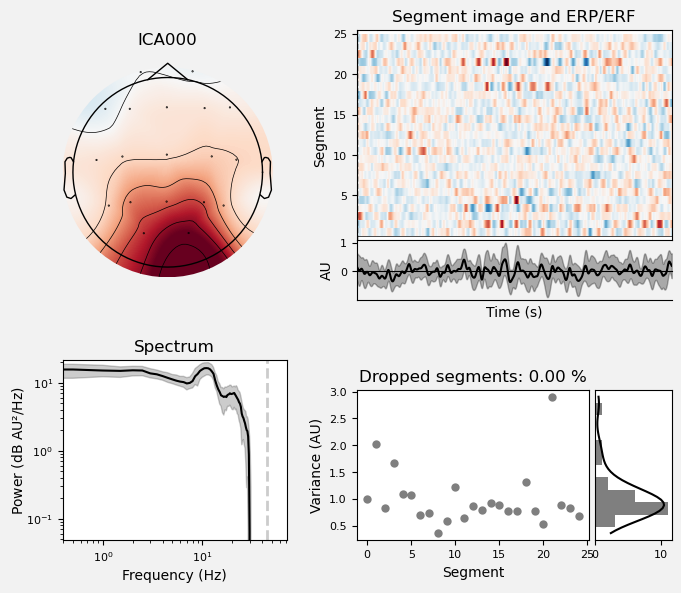

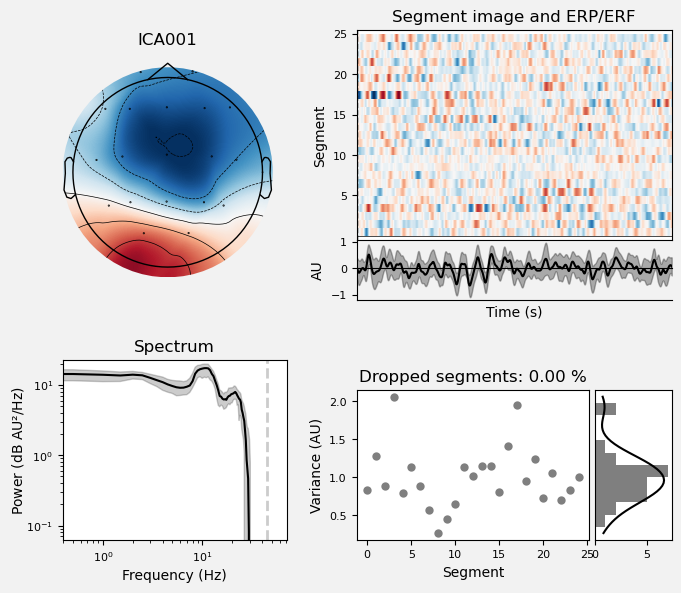

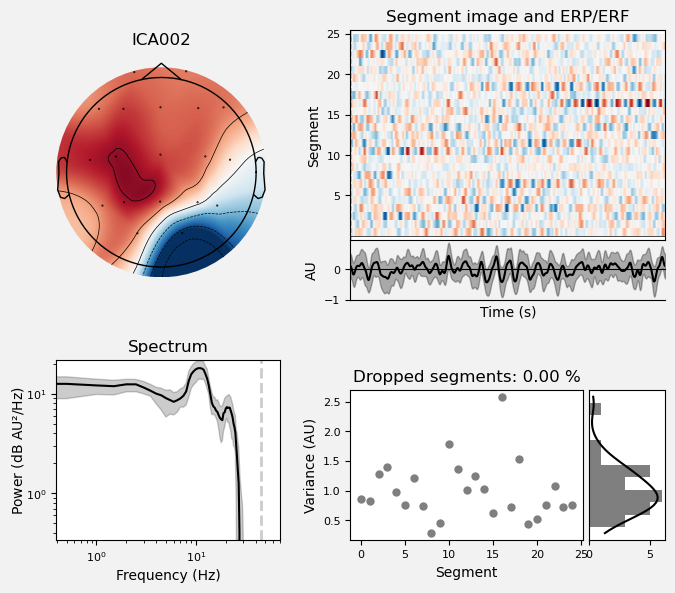

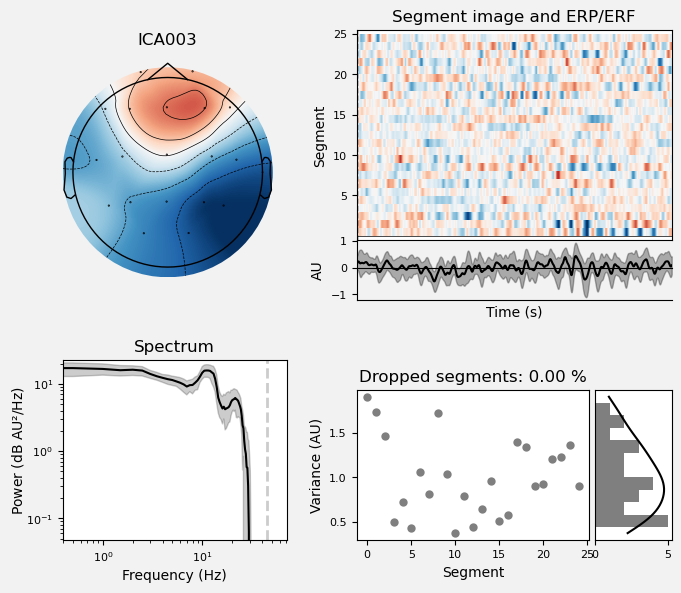

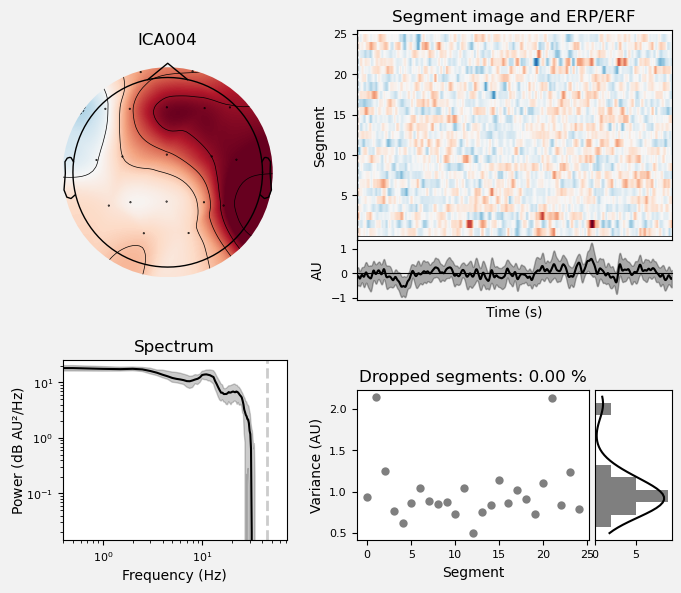

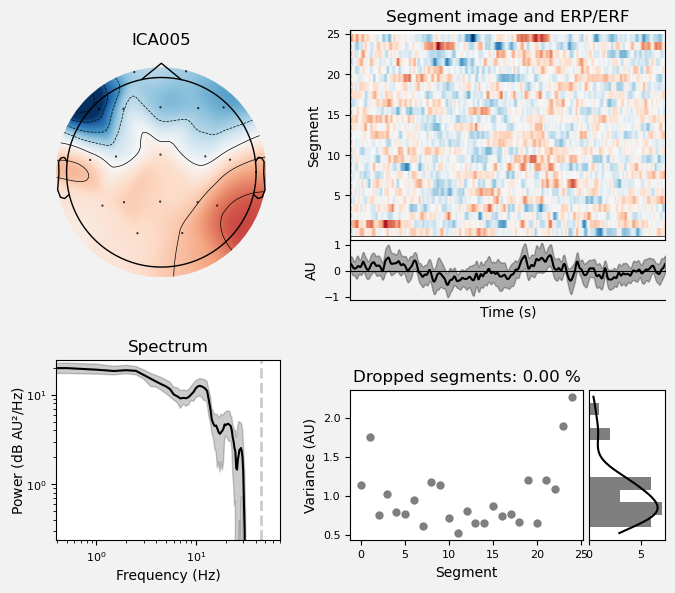

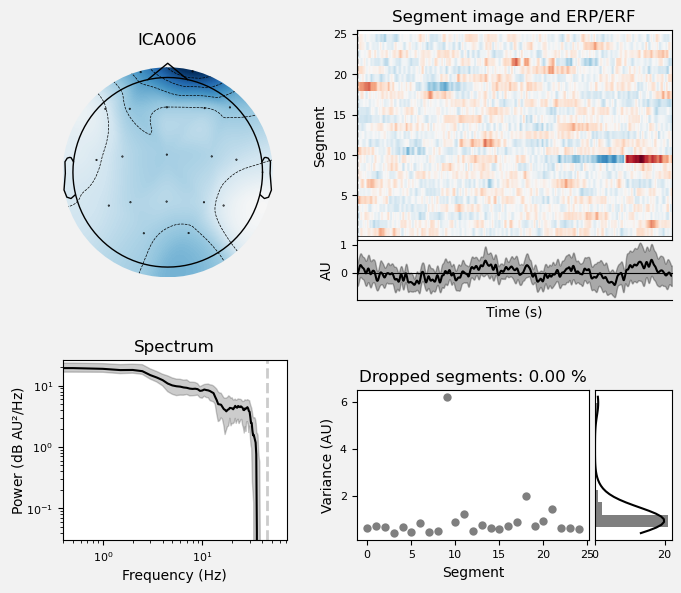

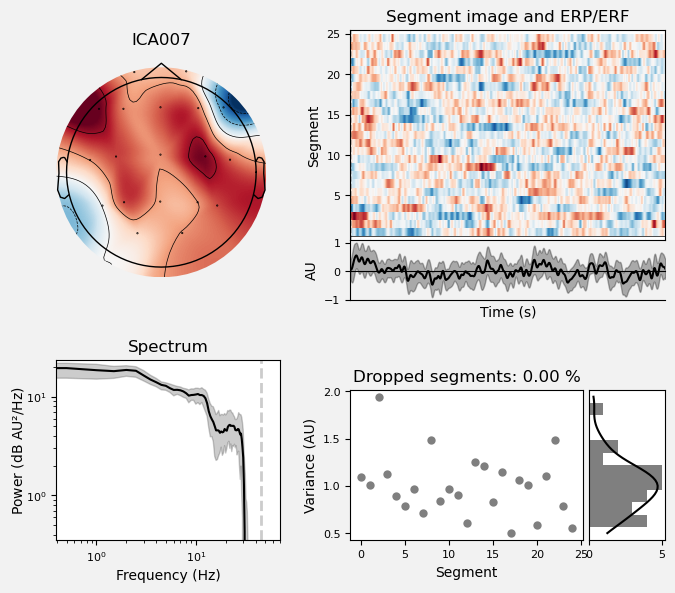

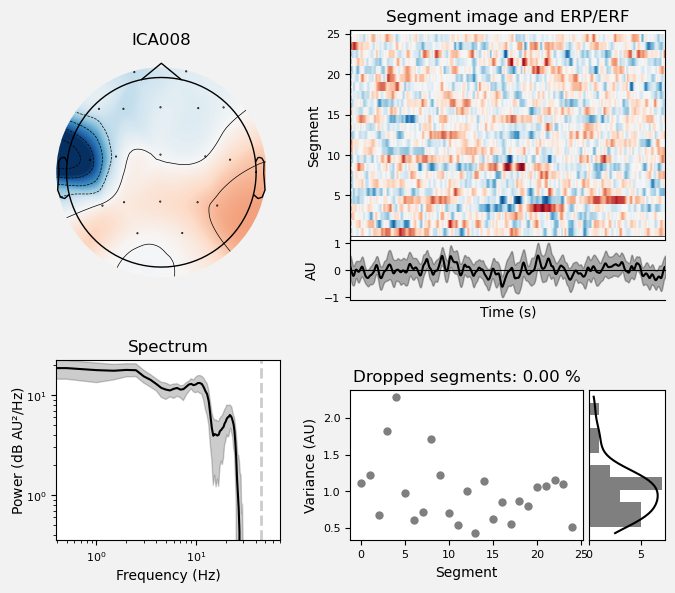

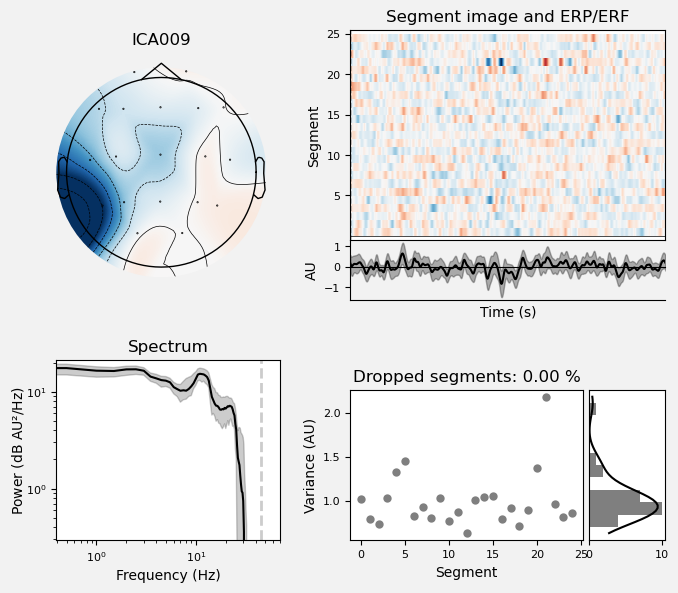

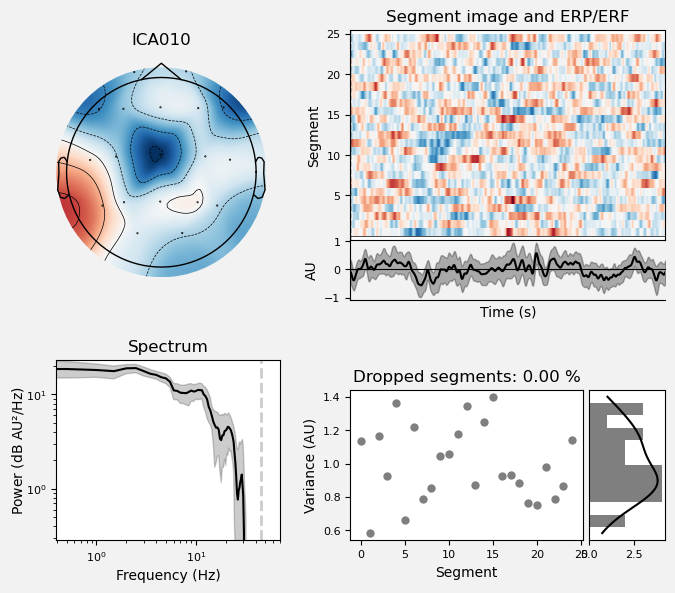

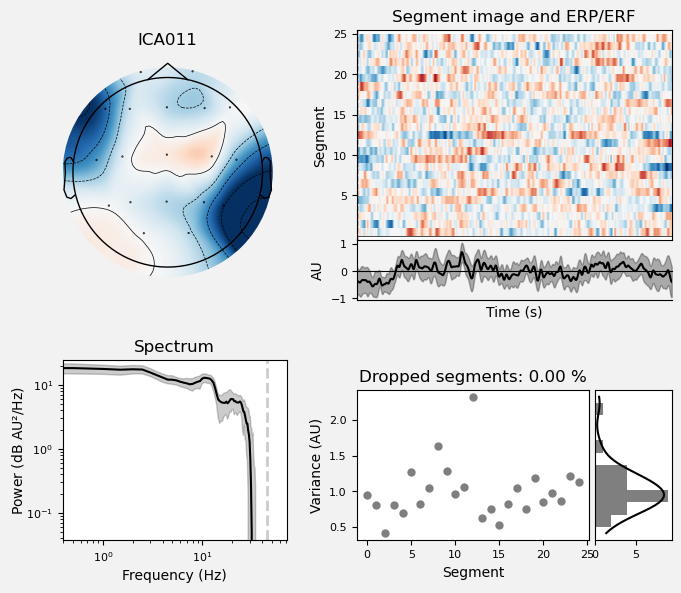

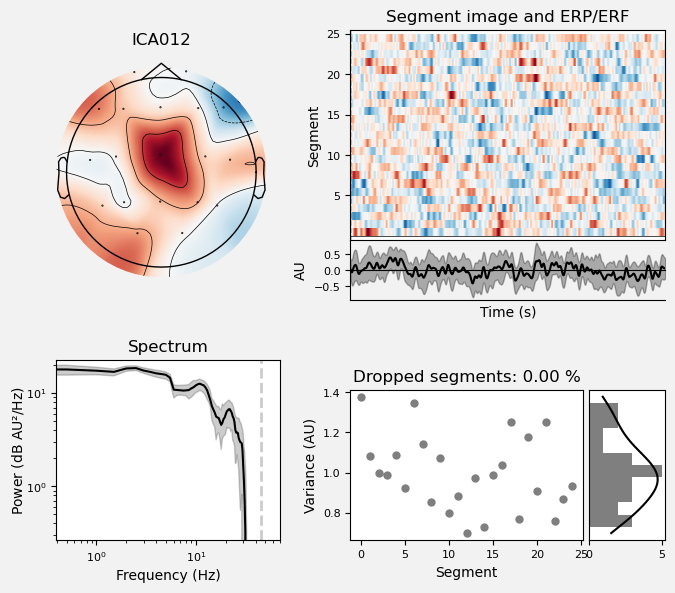

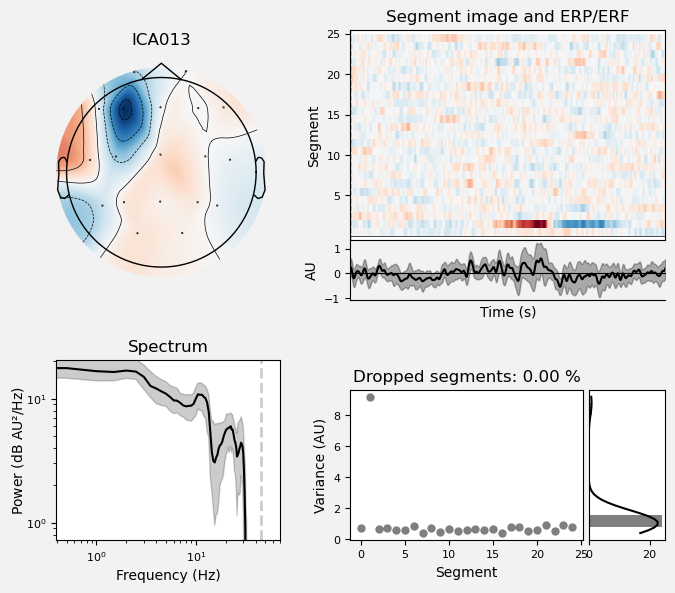

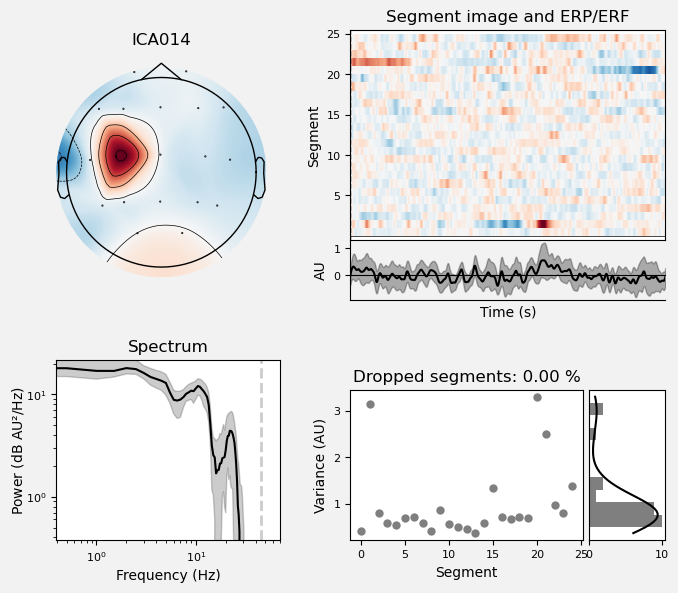

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [6]:
idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
ica.plot_properties(raw, picks=idx, log_scale=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated


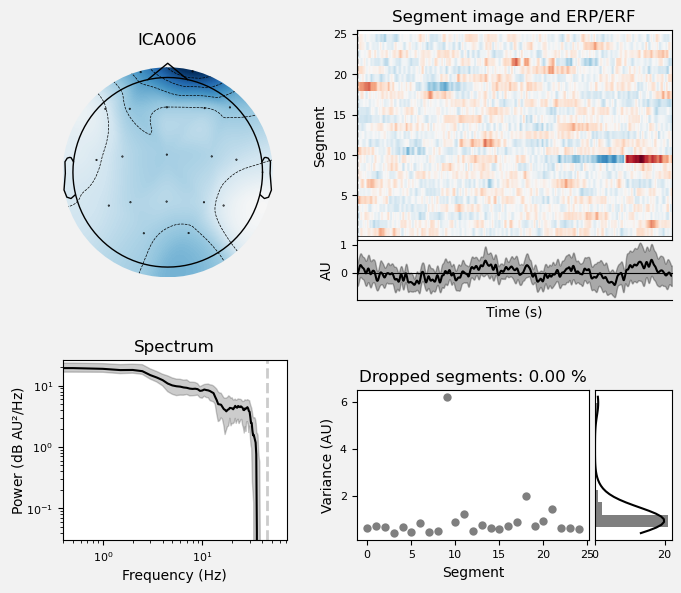

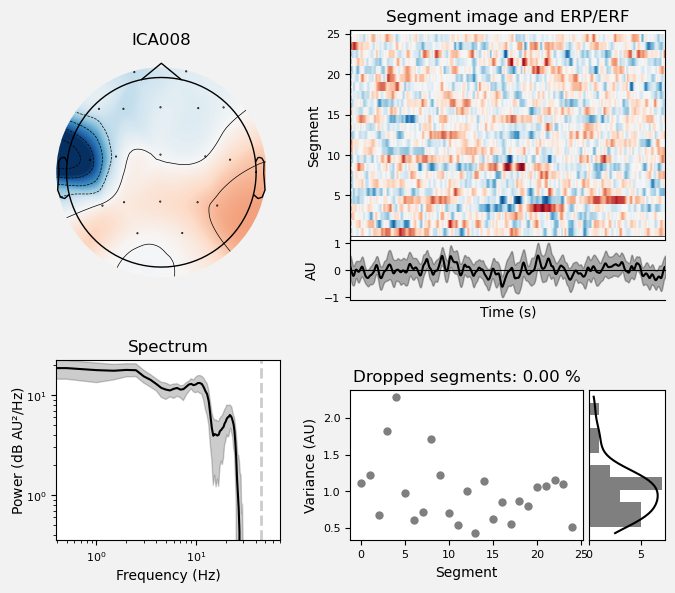

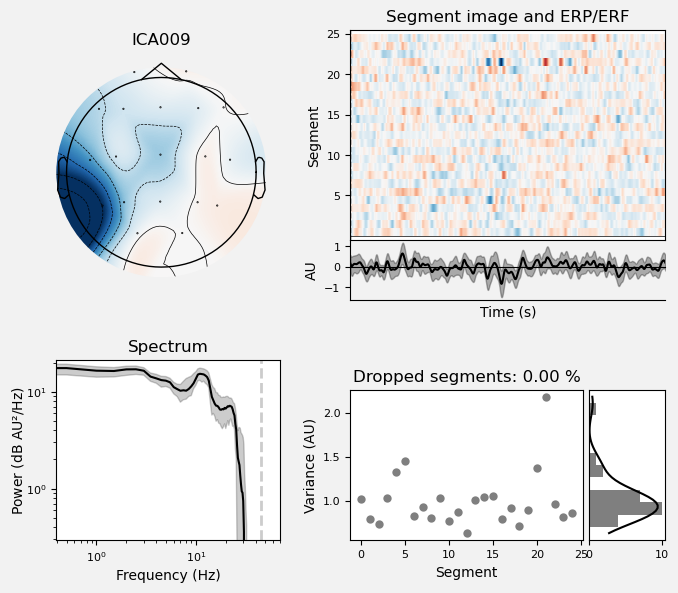

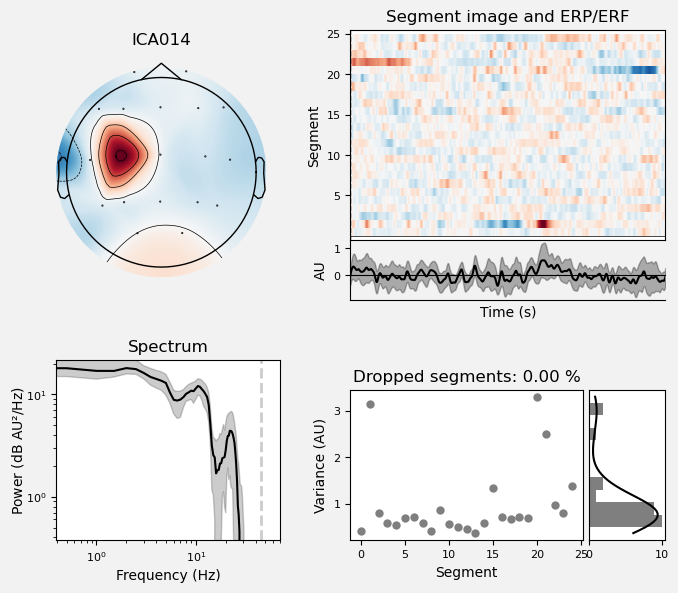

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 19 PCA components


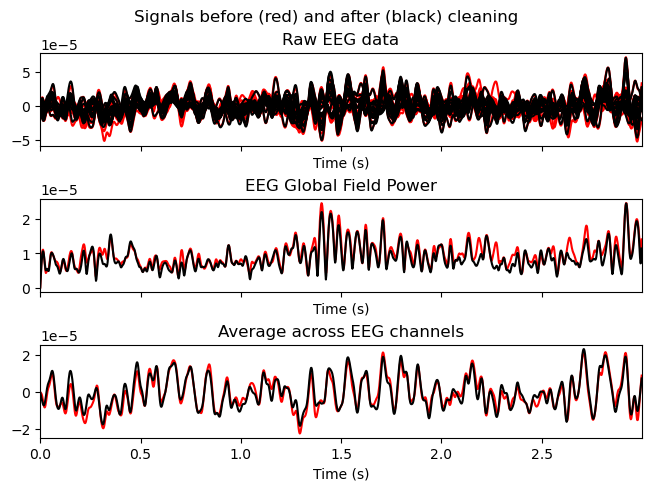

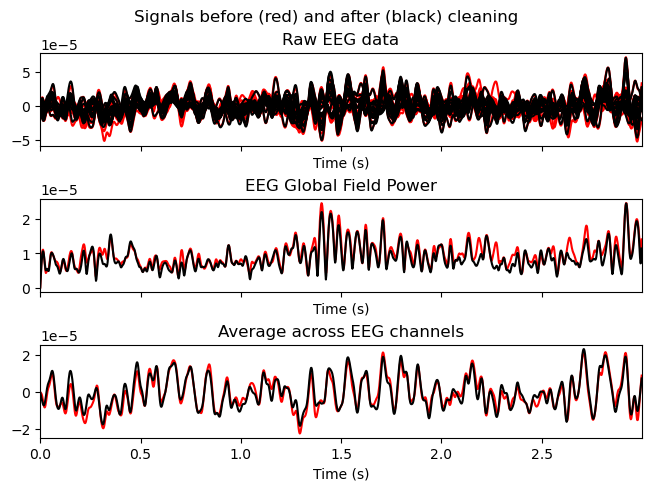

In [7]:
#visualmente, las ICAs que deberíamos eliminar son las siguientes, ya que
#pueden ser mezcla de señales con artefactos

muscle_idx = [6, 8, 9, 14]
ica.plot_properties(raw, picks=muscle_idx, log_scale=True)

ica.plot_overlay(raw, exclude=muscle_idx)

Finally, let's try an automated algorithm to find muscle components
and ensure that it gets the same components we did manually.



Effective window size : 4.096 (s)


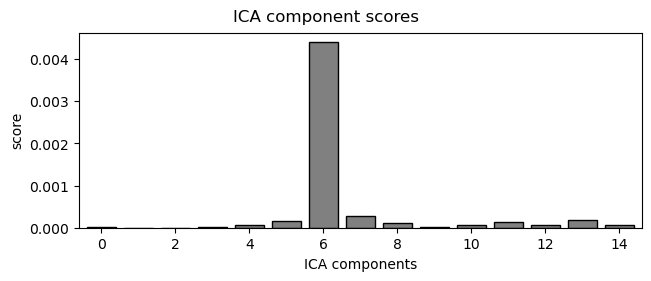

Manually found muscle artifact ICA components:      [6, 8, 9, 14]
Automatically found muscle artifact ICA components: []


In [8]:
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
ica.plot_scores(scores, exclude=muscle_idx_auto)
print(
    f"Manually found muscle artifact ICA components:      {muscle_idx}\n"
    f"Automatically found muscle artifact ICA components: {muscle_idx_auto}"
)

In [9]:
# Aplicar la corrección a los datos
comp_exclude = [6, 14]
raw_corrected = ica.apply(raw.copy(), exclude=comp_exclude)

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 19 PCA components


In [10]:
# Guardar la variable raw_corrected en un archivo .edf
output_file = 'datos_corregidos.edf'
mne.export.export_raw(output_file, raw_corrected, fmt='edf')

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

In [1]:
#Preprocesamiento: normalización y alineamiento

import numpy as np
import matplotlib.pyplot as plt

mean = np.mean(raw_corrected, axis=1, keepdims=True)
std = np.std(raw_corrected, axis=1, keepdims=True)

data_normalized = (raw_corrected - mean) / std

data_normalized.resample(100)

data_normalized.plot(n_channels=10, scalings='auto')
plt.show()

NameError: name 'raw_corrected' is not defined

## References

Dhani Dharmaprani, Hoang K. Nguyen, Trent W. Lewis, Dylan DeLosAngeles, John O. Willoughby, and Kenneth J. Pope. A comparison of independent component analysis algorithms and measures to discriminate between EEG and artifact components. In 2016 38th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (EMBC), 825–828. Orlando, FL, USA, 2016. IEEE. doi:10.1109/EMBC.2016.7590828.

